### **Laboratorio 10**

- Juan Pablo Solis
- Diego Garcia

### **Link de github**
https://github.com/JPS4321/Lab10_DL



## **Investigacion**

### **SHAP**
##### **Principio de Funcionamiento**

El método SHAP se basa en la teoría de juegos cooperativos de Shapley, donde cada característica del modelo se considera como un “jugador” que contribuye al resultado final de la predicción. El objetivo es determinar cuánto aporta cada característica al resultado del modelo, tomando en cuenta todas las combinaciones posibles de variables. En términos prácticos, SHAP calcula la contribución promedio marginal de cada característica sobre la predicción final, permitiendo interpretar de forma justa y consistente cómo influyen las variables en la salida del modelo.

##### **En que tipos de modelos se aplica**
SHAP  puede aplicarse a cualquier tipo de algoritmo. Sin embargo, existen implementaciones más eficientes para modelos basados en árboles de decisión, como XGBoost, LightGBM o Random Forest. También puede utilizarse con modelos lineales, redes neuronales y máquinas de soporte vectorial (SVM). Su versatilidad lo convierte en una herramienta útil tanto en tareas de clasificación como de regresión.

##### **Ejemplo**
Supongamos un modelo que predice la probabilidad de que un cliente obtenga un crédito, utilizando las variables ingreso, edad y historial crediticio. El modelo predice una probabilidad de aprobación del 80%. Usando SHAP, se obtiene que el ingreso contribuyó con +0.25, la edad con +0.05 y el historial crediticio con +0.30 a esa predicción. Esto significa que las variables ingreso e historial crediticio fueron las que más influyeron positivamente en la decisión del modelo.

### **LIME**
##### **Principio de Funcionamiento**

LIME busca explicar el comportamiento de un modelo complejo a nivel local, es decir, alrededor de una predicción específica. Lo hace generando pequeñas perturbaciones o variaciones de los datos de entrada y observando cómo cambia la predicción. Luego, ajusta un modelo simple y comprensible, como una regresión lineal o un árbol de decisión pequeño, para aproximar el comportamiento del modelo original en esa región local. De esta forma, LIME no intenta explicar todo el modelo, sino solo por qué tomó una decisión en un caso particular.

##### **En que tipos de modelos se aplica**
LIME puede aplicarse a modelos de clasificación o regresión, y es útil en algoritmos de caja negra como redes neuronales profundas, máquinas de soporte vectorial (SVM), random forest o boosting. Gracias a esta característica, LIME es uno de los métodos más utilizados para obtener explicaciones locales en sistemas de inteligencia artificial complejos.

##### **Ejemplo**
Imaginemos un modelo que clasifica correos electrónicos como “spam” o “no spam”. Para un correo específico, LIME genera múltiples versiones del mensaje modificando o eliminando algunas palabras y evalúa cómo cambian las predicciones. Luego, crea un modelo lineal que aproxima las decisiones locales del modelo original. El resultado puede indicar que las palabras “gratis”, “oferta” y “click” fueron las que más influyeron en que el correo fuera clasificado como spam.

### **Counterfactual Explanations**
##### **Principio de Funcionamiento**

Las explicaciones contrafactuales se basan en el principio de mostrar qué cambios mínimos serían necesarios en las variables de entrada para obtener un resultado diferente del modelo. En lugar de explicar cómo el modelo llegó a una decisión, buscan identificar qué modificaciones podrían alterar esa decisión. Este tipo de explicación se centra en ejemplos “qué pasaría si”, es decir, si una persona o entidad cambia ciertos valores de sus características, cómo cambiaría la salida del modelo.

##### **En que tipos de modelos se aplica**
Las explicaciones contrafactuales se aplican principalmente a modelos supervisados, tanto de clasificación como de regresión. Son especialmente útiles en contextos donde las decisiones del modelo afectan directamente a las personas, como en la aprobación de créditos, selección de candidatos o diagnósticos médicos. Este enfoque ayuda a los usuarios a entender qué acciones concretas pueden tomar para modificar un resultado desfavorable.

##### **Ejemplo**
Si un modelo de crédito rechaza una solicitud con base en los datos de un cliente que tiene un ingreso mensual de Q3,000, una edad de 25 años y ahorros de Q500, una explicación contrafactual podría indicar que si el ingreso fuera de al menos Q4,500 o los ahorros superaran Q2,000, el préstamo habría sido aprobado. Este tipo de explicación es muy útil porque traduce las decisiones del modelo en cambios concretos y comprensibles que una persona podría realizar para lograr un resultado distinto.


## CNN + LIME

In [1]:
!pip install lime scikit-image

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.8 MB 9.3 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.8 MB 10.1 MB/s eta 0:00:01
   ---------------------- ----------------- 7.1/12.8 MB 11.5 MB/s eta 0:00:01
   ------------------------------- -------- 10.2/12.8 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.8 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 11.8 MB/s  0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283840 sha256=6ead1810f2018d14dc9dcc011eedc6ee5bc4078656498f1c7c2225d0cbeb0b77
  Stored in directory: c:\users\dgv31\appdata\local\pip\cache\wheels\fd\a2\af\9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime

   ---------------------------------------- 0/5 [tifffile]

  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [3]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 8.81MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 551kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.90MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.52MB/s]


In [13]:
class CNN(nn.Module):
    def __init__(self, num_filters1=32, num_filters2=64, fc_neurons=128):
        super(CNN, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=num_filters1, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        
        self.conv2 = nn.Conv2d(in_channels=num_filters1, out_channels=num_filters2, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        
        self.fc1 = nn.Linear(num_filters2 * 7 * 7, fc_neurons)
        self.fc2 = nn.Linear(fc_neurons, 10)  

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [14]:
def train_model(model, optimizer, epochs=3):
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        acc = 100 * correct / total
        test_accuracies.append(acc)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Test Acc: {acc:.2f}%")

    
    return train_losses, test_accuracies

In [15]:
model_sgd = CNN()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)

losses_sgd, acc_sgd = train_model(model_sgd, optimizer_sgd, epochs=3)

Epoch 1/3, Loss: 0.1893, Test Acc: 98.27%
Epoch 2/3, Loss: 0.0484, Test Acc: 98.85%
Epoch 3/3, Loss: 0.0336, Test Acc: 98.90%


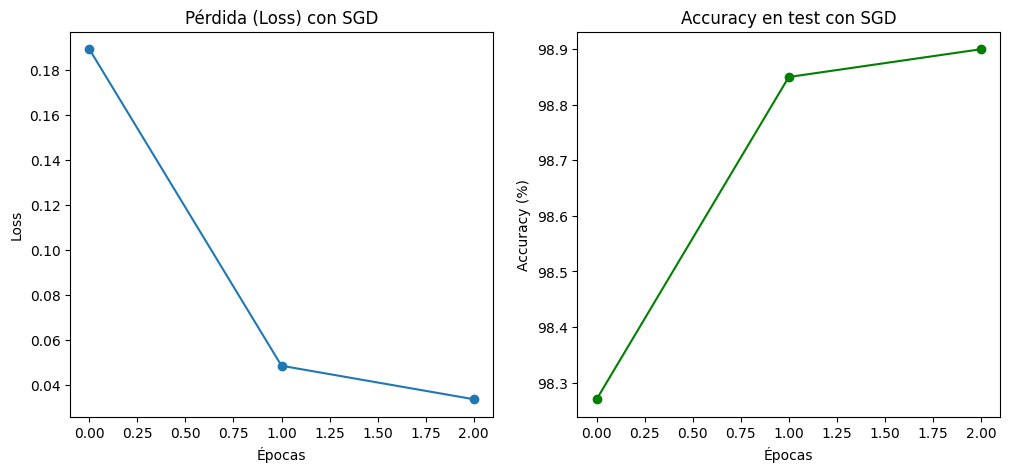

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses_sgd, marker='o')
plt.title("Pérdida (Loss) con SGD")
plt.xlabel("Épocas")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(acc_sgd, marker='o', color='green')
plt.title("Accuracy en test con SGD")
plt.xlabel("Épocas")
plt.ylabel("Accuracy (%)")

plt.show()

In [8]:
def get_mnist_image_rgb(index):
    # test_dataset.data: tensor [N,28,28] con valores 0-255
    img = test_dataset.data[index].numpy().astype(np.float32) / 255.0  # [0,1]
    label = int(test_dataset.targets[index].item())
    
    # Convertir a 'RGB' falso: replicar el canal gris en 3 canales
    image_rgb = np.stack([img, img, img], axis=2)  # (28,28,3)
    return image_rgb, label


# Elegir automáticamente un ejemplo que el modelo clasifique bien
def find_correct_example(start_index=0, max_tries=200):
    model_sgd.eval()
    mean, std = 0.1307, 0.3081

    for idx in range(start_index, min(start_index + max_tries, len(test_dataset))):
        # Imagen cruda [28,28] -> [1,1,28,28]
        img = test_dataset.data[idx].unsqueeze(0).unsqueeze(0).float() / 255.0
        img_norm = (img - mean) / std

        with torch.no_grad():
            logits = model_sgd(img_norm)
            pred = logits.argmax(dim=1).item()
        
        y_true = int(test_dataset.targets[idx].item())
        if pred == y_true:
            return idx, y_true, pred
    
    # Si no encuentra (poco probable), devuelve el primero
    return 0, int(test_dataset.targets[0].item()), None


In [9]:
def cnn_predict(images):
    model_sgd.eval()
    mean, std = 0.1307, 0.3081

    images = np.array(images, dtype=np.float32)  # (N,28,28,3)
    if images.ndim == 3:  # caso de una sola imagen
        images = images[np.newaxis, ...]

    # Convertir a escala de grises: promedio de los 3 canales
    images_gray = images.mean(axis=3, keepdims=True)  # (N,28,28,1)

    # Normalizar igual que en el entrenamiento: (x - mean) / std
    images_gray = (images_gray - mean) / std

    # (N,28,28,1) -> (N,1,28,28) para la CNN
    images_tensor = torch.from_numpy(images_gray.transpose(0, 3, 1, 2))  # NCHW
    images_tensor = images_tensor.float()

    with torch.no_grad():
        logits = model_sgd(images_tensor)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
    
    return probs

In [10]:
explainer = lime_image.LimeImageExplainer()

Ejemplo elegido -> índice: 1, etiqueta verdadera: 2, predicción modelo: 2


  0%|          | 0/1000 [00:00<?, ?it/s]

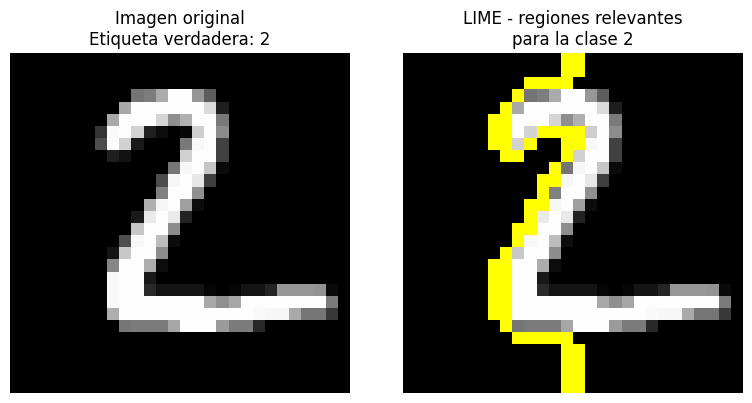

In [32]:
# Elegimos automáticamente un ejemplo correctamente clasificado
# (puedes cambiar start_index para ir probando otros)
idx, y_true, y_pred = find_correct_example(start_index=1)
print(f"Ejemplo elegido -> índice: {idx}, etiqueta verdadera: {y_true}, predicción modelo: {y_pred}")

# Obtenemos la imagen en formato RGB [0,1]
image_rgb, label = get_mnist_image_rgb(idx)

# Generamos la explicación con LIME
explanation = explainer.explain_instance(
    image_rgb,
    classifier_fn=cnn_predict,
    top_labels=5,     # analizará hasta 5 clases más probables
    hide_color=0,     # color a usar para "ocultar" superpixeles
    num_samples=1000  # número de muestras perturbadas (balance entre calidad y tiempo)
)

# Tomamos la clase que queremos explicar:
#   - puede ser la predicción del modelo (y_pred)
#   - o la etiqueta verdadera (label)
label_to_explain = y_pred  # o usa 'label' si quieres explicar la clase verdadera

# Obtener imagen y máscara de regiones importantes
temp, mask = explanation.get_image_and_mask(
    label_to_explain,
    positive_only=True,   # solo regiones que favorecen la clase
    num_features=10,      # número de superpixeles destacados
    hide_rest=False       # no ocultar el resto de la imagen
)

# Visualización
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title(f"Imagen original\nEtiqueta verdadera: {label}")
plt.imshow(image_rgb[:, :, 0], cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"LIME - regiones relevantes\npara la clase {label_to_explain}")
plt.imshow(mark_boundaries(image_rgb, mask))
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
def explicar_ejemplo(idx):
    image_rgb, label = get_mnist_image_rgb(idx)

    # Predicción del modelo sobre este ejemplo (para mostrarla)
    mean, std = 0.1307, 0.3081
    img_gray = image_rgb[:, :, 0:1]  # (28,28,1)
    img_norm = (img_gray - mean) / std
    img_tensor = torch.from_numpy(img_norm.transpose(2, 0, 1)).unsqueeze(0).float()  # (1,1,28,28)

    model_sgd.eval()
    with torch.no_grad():
        logits = model_sgd(img_tensor)
        y_pred = logits.argmax(dim=1).item()

    print(f"Índice: {idx} | Etiqueta verdadera: {label} | Predicción modelo: {y_pred}")

    # Explicación LIME
    explanation = explainer.explain_instance(
        image_rgb,
        classifier_fn=cnn_predict,
        top_labels=5,
        hide_color=0,
        num_samples=1000
    )

    label_to_explain = y_pred  # puedes cambiar a 'label' si quieres explicar la clase verdadera

    temp, mask = explanation.get_image_and_mask(
        label_to_explain,
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title(f"Original (y={label})")
    plt.imshow(image_rgb[:, :, 0], cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"LIME (clase {label_to_explain})")
    plt.imshow(mark_boundaries(image_rgb, mask))
    plt.axis("off")

    plt.tight_layout()
    plt.show()

Índice: 12 | Etiqueta verdadera: 9 | Predicción modelo: 9


  0%|          | 0/1000 [00:00<?, ?it/s]

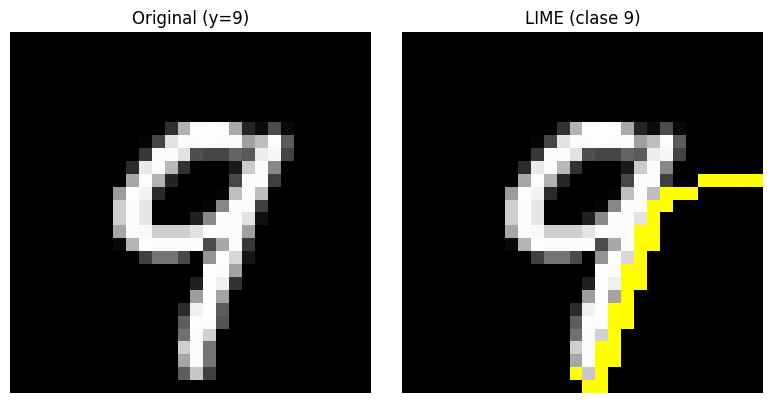

In [18]:
explicar_ejemplo(12)

Índice: 500 | Etiqueta verdadera: 3 | Predicción modelo: 3


  0%|          | 0/1000 [00:00<?, ?it/s]

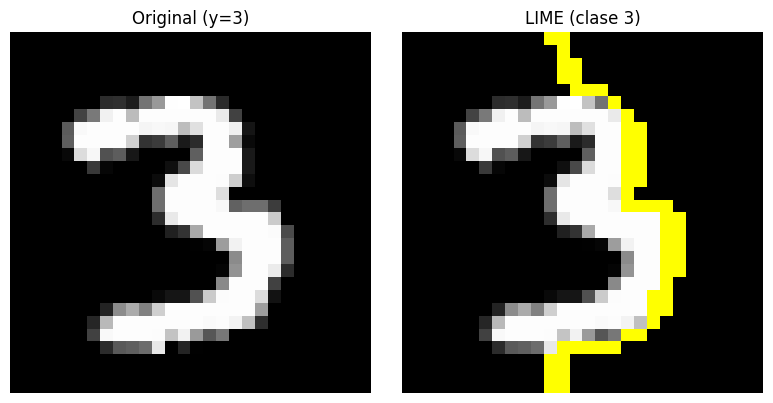

In [19]:
explicar_ejemplo(500)

Índice: 675 | Etiqueta verdadera: 1 | Predicción modelo: 1


  0%|          | 0/1000 [00:00<?, ?it/s]

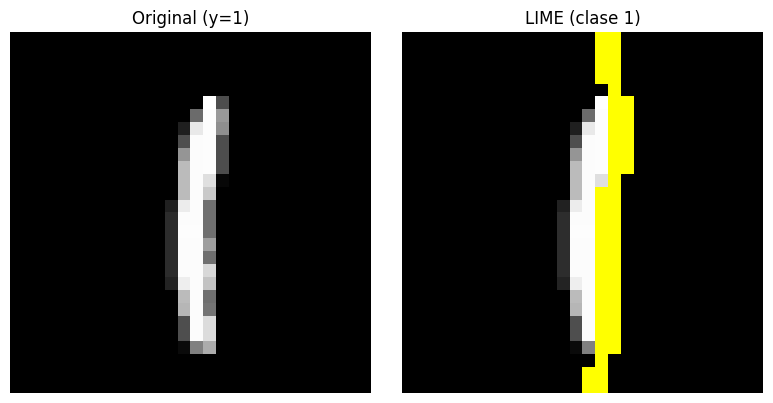

In [20]:
explicar_ejemplo(675)

Índice: 1045 | Etiqueta verdadera: 9 | Predicción modelo: 9


  0%|          | 0/1000 [00:00<?, ?it/s]

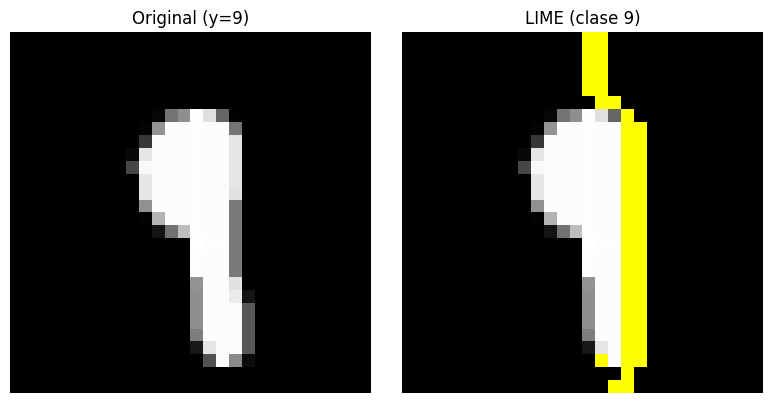

In [21]:
explicar_ejemplo(1045)

Índice: 8510 | Etiqueta verdadera: 7 | Predicción modelo: 7


  0%|          | 0/1000 [00:00<?, ?it/s]

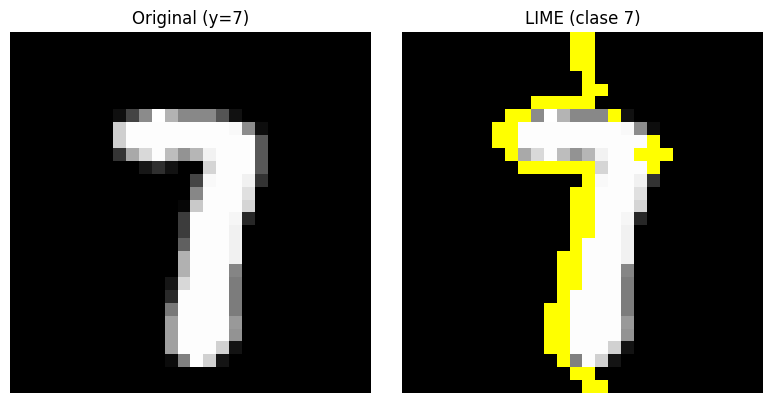

In [22]:
explicar_ejemplo(8510)

Índice: 6041 | Etiqueta verdadera: 2 | Predicción modelo: 2


  0%|          | 0/1000 [00:00<?, ?it/s]

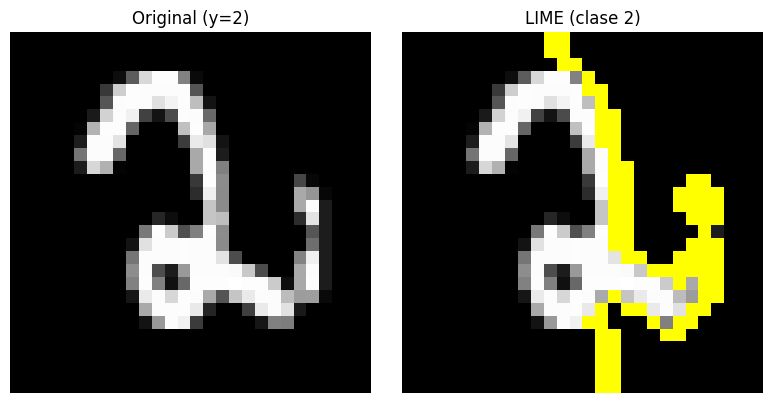

In [25]:
explicar_ejemplo(6041)

Índice: 3448 | Etiqueta verdadera: 3 | Predicción modelo: 3


  0%|          | 0/1000 [00:00<?, ?it/s]

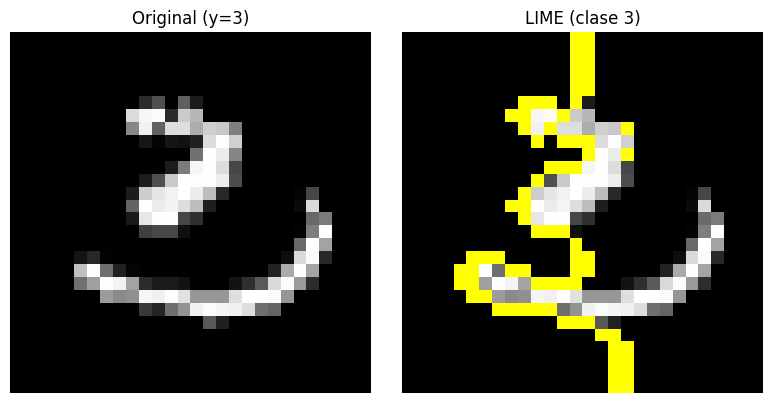

In [38]:
explicar_ejemplo(3448)

Índice: 3888 | Etiqueta verdadera: 9 | Predicción modelo: 9


  0%|          | 0/1000 [00:00<?, ?it/s]

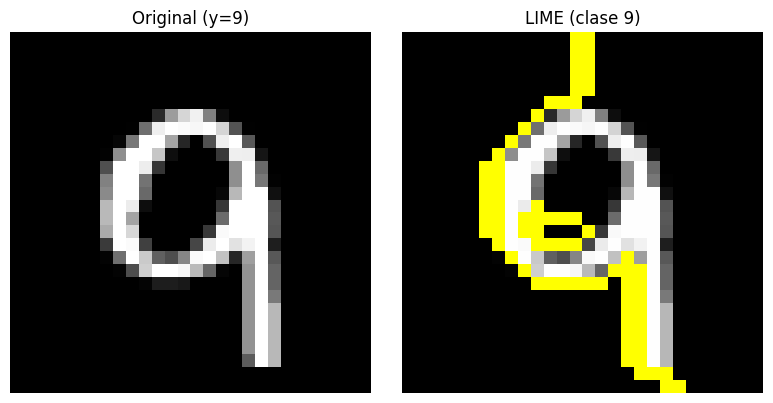

In [39]:
explicar_ejemplo(3888)

Índice: 753 | Etiqueta verdadera: 3 | Predicción modelo: 3


  0%|          | 0/1000 [00:00<?, ?it/s]

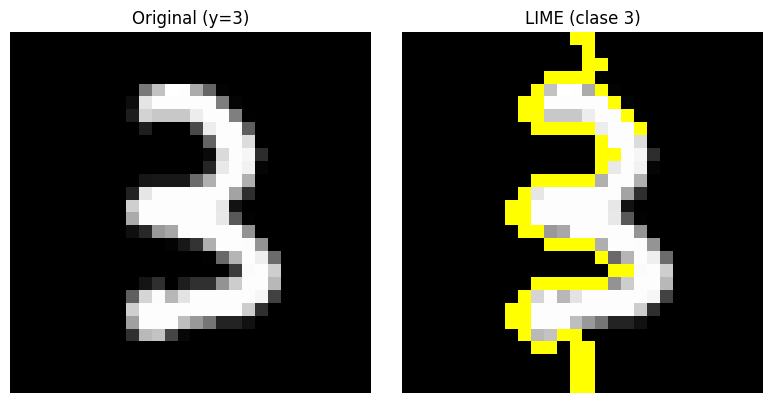

In [28]:
explicar_ejemplo(753)

Índice: 777 | Etiqueta verdadera: 1 | Predicción modelo: 1


  0%|          | 0/1000 [00:00<?, ?it/s]

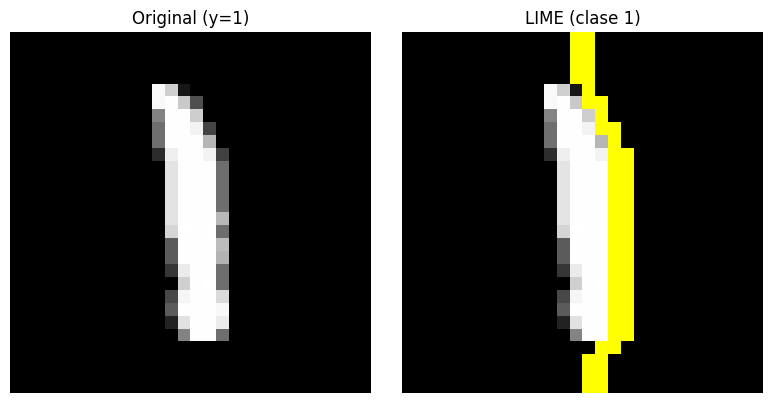

In [40]:
explicar_ejemplo(777)

Índice: 1252 | Etiqueta verdadera: 5 | Predicción modelo: 5


  0%|          | 0/1000 [00:00<?, ?it/s]

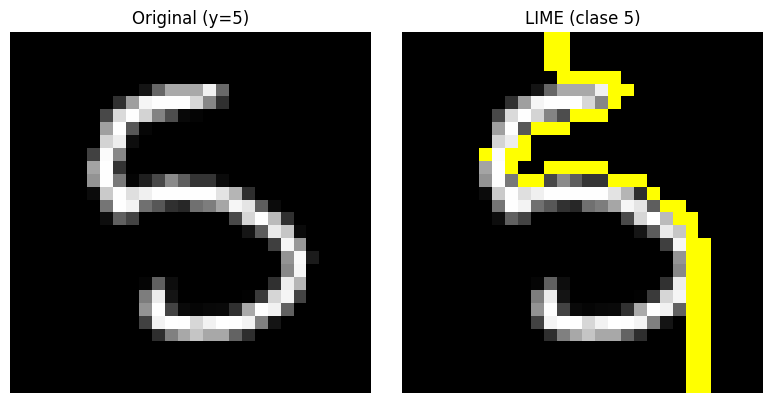

In [31]:
explicar_ejemplo(1252)